In [84]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif,mutual_info_classif
import matplotlib.pyplot as plt

In [85]:
card_df = pd.read_csv("CardiologyN-Wekat.csv")
card_df['class'].value_counts()

1    165
0    138
Name: class, dtype: int64

In [86]:
col = card_df.columns
scaler = MinMaxScaler()
scaler.fit(card_df)
scaled_np = scaler.transform(card_df)
scaled_df = pd.DataFrame(scaled_np)
scaled_df.columns = col
scaled_df

,age,sex,chest-pain-type,blood-pressure,cholesterol,Fasting-blood-sugar<120,resting-ecg,maximum-heart-rate,angina,peak,slope,#colored-vessels,thal,class
0,0.645833,1.0,1.000000,0.339623,0.182648,0.0,1.0,0.465649,1.0,0.387097,0.5,0.666667,1.0,0.0
1,0.416667,1.0,0.333333,0.339623,0.319635,0.0,0.0,0.763359,0.0,0.096774,0.0,0.000000,0.0,1.0
2,0.729167,1.0,0.000000,0.150943,0.194064,0.0,1.0,0.557252,1.0,0.290323,0.5,0.000000,0.0,1.0
3,0.708333,1.0,1.000000,0.339623,0.292237,0.0,1.0,0.580153,0.0,0.225806,0.5,0.333333,1.0,0.0
4,0.500000,1.0,1.000000,0.433962,0.175799,1.0,1.0,0.641221,1.0,0.500000,1.0,0.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.395833,1.0,0.666667,0.283019,0.294521,1.0,0.0,0.793893,0.0,0.000000,0.0,0.666667,0.0,1.0
299,0.583333,1.0,1.000000,0.358491,0.184932,0.0,0.0,0.740458,1.0,0.000000,0.0,0.000000,1.0,1.0
300,0.416667,1.0,0.666667,0.226415,0.052511,0.0,1.0,0.419847,0.0,0.129032,0.0,1.000000,0.0,0.0
301,0.937500,0.0,0.333333,0.245283,0.326484,0.0,1.0,0.381679,1.0,0.032258,0.0,0.333333,0.0,1.0


In [87]:
y= scaled_df['class']
X = scaled_df.drop(['class'], axis = 1)
clf = DecisionTreeClassifier(random_state = 0)
val_score = cross_val_score(clf, X, y, cv= 10)
print(val_score.mean(),val_score.std())

0.7284946236559139 0.09198577508953756


In [88]:
forest = ExtraTreesClassifier(n_estimators = 25,random_state=0)
val_score = cross_val_score(forest, X, y, cv= 10)
print(val_score.mean(),val_score.std())

0.8216129032258065 0.07214316581733367


In [89]:
X_new = SelectKBest(chi2, k=7).fit_transform(X,y)
#X_new.shape
X_new

array([[1.        , 1.        , 1.        , ..., 0.5       , 0.66666667,
        1.        ],
       [1.        , 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.5       , 0.        ,
        0.        ],
       ...,
       [1.        , 0.66666667, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.33333333, 1.        , ..., 0.        , 0.33333333,
        0.        ],
       [0.        , 0.66666667, 0.        , ..., 0.        , 0.33333333,
        0.        ]])

In [90]:
val_score = cross_val_score(clf, X_new, y, cv= 10)
print(val_score.mean(),val_score.std())

0.7518279569892472 0.09677275984601073


In [91]:
val_score = cross_val_score(forest, X_new, y, cv= 10)
print(val_score.mean(),val_score.std())

0.8082795698924732 0.07172623342257498


Feature ranking:
1. feature thal (0.162457)
2. feature #colored-vessels (0.141236)
3. feature chest-pain-type (0.121296)
4. feature peak (0.090071)
5. feature maximum-heart-rate (0.079244)
6. feature angina (0.072200)
7. feature age (0.069743)
8. feature cholesterol (0.059903)
9. feature blood-pressure (0.053414)
10. feature slope (0.051281)
11. feature sex (0.042853)
12. feature resting-ecg (0.035848)
13. feature Fasting-blood-sugar<120 (0.020455)


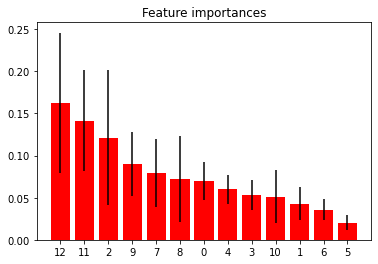

In [92]:
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [93]:
X.columns

Index(['age', 'sex', 'chest-pain-type', 'blood-pressure', 'cholesterol',
       'Fasting-blood-sugar<120', 'resting-ecg', 'maximum-heart-rate',
       'angina', 'peak', 'slope', '#colored-vessels', 'thal'],
      dtype='object')

In [94]:
X_new = X[['thal','#colored-vessels','chest-pain-type','peak','maximum-heart-rate','angina','age']]
X_new

,thal,#colored-vessels,chest-pain-type,peak,maximum-heart-rate,angina,age
0,1.0,0.666667,1.000000,0.387097,0.465649,1.0,0.645833
1,0.0,0.000000,0.333333,0.096774,0.763359,0.0,0.416667
2,0.0,0.000000,0.000000,0.290323,0.557252,1.0,0.729167
3,1.0,0.333333,1.000000,0.225806,0.580153,0.0,0.708333
4,1.0,0.000000,1.000000,0.500000,0.641221,1.0,0.500000
...,...,...,...,...,...,...,...
298,0.0,0.666667,0.666667,0.000000,0.793893,0.0,0.395833
299,1.0,0.000000,1.000000,0.000000,0.740458,1.0,0.583333
300,0.0,1.000000,0.666667,0.129032,0.419847,0.0,0.416667
301,0.0,0.333333,0.333333,0.032258,0.381679,1.0,0.937500


In [95]:
val_score = cross_val_score(clf, X_new, y, cv= 10)
print(val_score.mean(),val_score.std())

0.725268817204301 0.08965478943988954


In [96]:
val_score = cross_val_score(forest, X_new, y, cv= 10)
print(val_score.mean(),val_score.std())

0.8216129032258064 0.09095839958127996


In [ ]:
#Extra trees Classifier is best